<h1>로지스틱 회귀</h1>

# 라이브러리와 데이터

In [ ]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # 훈련/평가 데이터 분리
from sklearn.linear_model import LogisticRegression  # 로지스틱회귀 모델

In [ ]:
# read data
df = pd.read_csv('data03_carseat.csv')
df.head()

,Sales,SalesBin,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Dummy01,Dummy02,Dummy03,Dummy04,Dummy05,Dummy06
0,9.50,High,138,73,11,276,120,Bad,42,17,Yes,Yes,38,7,8,16,105,41
1,11.22,High,111,48,16,260,83,Good,65,10,Yes,Yes,21,5,23,12,155,22
2,10.06,High,113,35,10,269,80,Medium,59,12,Yes,Yes,29,7,3,26,195,27
3,7.40,Low,117,100,4,466,97,Medium,55,14,Yes,Yes,81,7,40,23,131,10
4,4.15,Low,141,64,3,340,128,Bad,38,13,Yes,No,71,7,7,11,129,14


# 데이터 세팅

In [ ]:
Y = df['SalesBin']
Xorg = df.iloc[:,2:]
# making dummy variables
X = pd.get_dummies(Xorg,drop_first=True)

xtrain_org, xtest_org, ytrain, ytest = train_test_split(X,Y,test_size=0.5,random_state=0)

In [ ]:
ytrain[:5]

,SalesBin
91,Low
59,Low
0,High
34,Low
28,Low


# 모든 변수를 이용한 예측

In [ ]:
xtrain = xtrain_org
xtest = xtest_org

f = LogisticRegression(max_iter=10000)
f.fit(xtrain,ytrain)

LogisticRegression(max_iter=10000)

In [ ]:
print(f.intercept_,f.coef_)

[6.36732601] [[-0.14180985 -0.03380799 -0.35551323 -0.00274203  0.1094108   0.04287114
   0.17595487 -0.01216128 -0.20850409  0.00326125 -0.08970089  0.0296992
  -0.06850012 -1.90130854 -0.1128427   0.56697921  0.55361221]]


In [ ]:
# 훈련 데이터에 대한 예측
yhat_train = f.predict(xtrain)
pd.crosstab(yhat_train,ytrain)

SalesBin,High,Low
row_0,,
High,19,2
Low,2,27


In [ ]:
f.score(xtrain,ytrain)

0.92

In [ ]:
# 평가 데이터에 대한 예측
yhat_test = f.predict(xtest)
pd.crosstab(yhat_test,ytest)

SalesBin,High,Low
row_0,,
High,20,3
Low,4,23


In [ ]:
f.score(xtest,ytest)

0.86

# 다양한 평가 지표들

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [ ]:
recall_score( ytest, f.predict(xtest), pos_label='High' )  # 20/24

0.8333333333333334

In [ ]:
precision_score( ytest, f.predict(xtest), pos_label='High' ) # 20/23

0.8695652173913043

In [ ]:
f1_score( ytest, f.predict(xtest), pos_label='High' )

0.851063829787234

# 예측 곡선

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay

In [ ]:
ytest_proba = f.predict_proba(xtest)
ytest_proba[:5,:]

array([[6.00202634e-01, 3.99797366e-01],
       [6.94899516e-01, 3.05100484e-01],
       [7.15966397e-01, 2.84033603e-01],
       [2.91061629e-03, 9.97089384e-01],
       [9.99913545e-01, 8.64551651e-05]])

In [ ]:
fpr, tpr, th = roc_curve(ytest, ytest_proba[:,1], pos_label='High')

In [ ]:
pd.DataFrame( np.array([fpr,tpr,th]).T, columns=['fpr','tpr','threshold'] )

,fpr,tpr,threshold
0,0.000000,0.000000,inf
1,0.038462,0.000000,0.999286
2,0.538462,0.000000,0.901136
3,0.538462,0.041667,0.898740
4,0.615385,0.041667,0.884830
5,0.615385,0.083333,0.874929
6,0.653846,0.083333,0.871436
7,0.653846,0.125000,0.861294
8,0.769231,0.125000,0.779624
9,0.769231,0.166667,0.756152


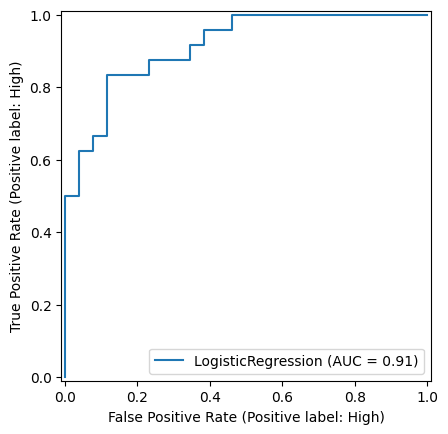

In [ ]:
RocCurveDisplay.from_estimator(f,xtest,ytest,pos_label='High')

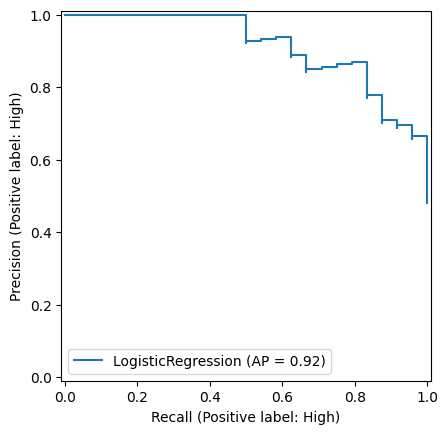

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(f,xtest,ytest,pos_label='High')

# 연습문제

1. 위의 로지스틱회귀에서 불필요한 변수(dummy01~dummy06)를 모두 제거하였을 때의 훈련/평가 데이터 셋의 성능을 측정하시오.

In [ ]:
# 1. 'Dummy' 변수들을 제외한 데이터 선택
# 'CompPrice'부터 'US' 열까지만 선택합니다.
Xorg_new = df.loc[:, 'CompPrice':'US']

# 2. 범주형 변수를 더미 변수로 변환
X_new = pd.get_dummies(Xorg_new, drop_first=True)

# 3. 훈련/평가 데이터 분리 (동일한 random_state=0 사용)
xtrain_new, xtest_new, ytrain_new, ytest_new = train_test_split(X_new, Y, test_size=0.5, random_state=0)

# 4. 새로운 로지스틱 회귀 모델 생성 및 학습
f_new = LogisticRegression(max_iter=10000)
f_new.fit(xtrain_new, ytrain_new)

# 5. 성능 측정
train_score = f_new.score(xtrain_new, ytrain_new)
test_score = f_new.score(xtest_new, ytest_new)

print(f"Dummy 변수 제거 후 훈련 데이터 정확도: {train_score:.4f}")
print(f"Dummy 변수 제거 후 평가 데이터 정확도: {test_score:.4f}")

# (참고) 이전 모델 성능
print(f"\n(참고) Dummy 변수 포함 시 훈련 데이터 정확도: {f.score(xtrain, ytrain):.4f}")
print(f"(참고) Dummy 변수 포함 시 평가 데이터 정확도: {f.score(xtest, ytest):.4f}")

Dummy 변수 제거 후 훈련 데이터 정확도: 0.9400
Dummy 변수 제거 후 평가 데이터 정확도: 0.8400

(참고) Dummy 변수 포함 시 훈련 데이터 정확도: 0.9200
(참고) Dummy 변수 포함 시 평가 데이터 정확도: 0.8600


2. iris_noisy 데이터를 이용하여 로지스틱회귀 모델을 적용하시오. 모델 복잡성 예제에서 한 것과 같은 방식으로 훈련/평가 데이터를 분리하시오. 정확도, 재현율, 정밀도, F1 을 계산하고, ROC 커브와 Precision-Recall 커브를 그리시오. 모든 경우 1을 양성 클래스로 두고 푸시오.

In [ ]:
df2 = pd.read_csv('data02_iris_noisy.csv')
df2.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,7.071079,3.539777,4.801605,1.894124,0
1,6.196075,3.875708,4.777633,1.037370,0
2,7.162724,3.156700,5.567441,2.725814,0
3,5.257869,1.538519,3.760564,0.224424,0
4,6.721558,3.223049,3.733300,1.619530,0


--- Iris Noisy (1 vs All) 로지스틱 회귀 평가 ---
1. 정확도 (Accuracy): 0.7800
2. 재현율 (Recall): 0.8750
3. 정밀도 (Precision): 0.7241
4. F1 점수 (F1-Score): 0.7925


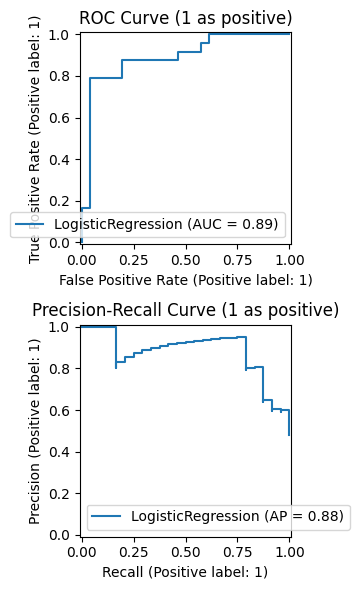

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
import warnings

# 경고 메시지 무시 (선택 사항)
warnings.filterwarnings('ignore')

# 1. 데이터 불러오기
try:
    df_iris = pd.read_csv('data02_iris_noisy.csv')
except FileNotFoundError:
    print("오류: 'data02_iris_noisy.csv' 파일을 찾을 수 없습니다.")
    print("노트북과 같은 폴더에 파일이 있는지 확인해주세요.")
    # 파일이 없으면 더 이상 진행하지 않음
    exit()

# 2. 데이터 준비 (X, Y)
# 'Species' 열을 Y로, 나머지 열을 X로 지정
X_iris = df_iris.drop('Species', axis=1)
Y_original = df_iris['Species']

# 3. 타겟 변수 이진화 (클래스 1 vs 나머지)
# 'Species' 값이 1이면 1 (양성), 아니면 0 (음성)
Y_iris = (Y_original == 1).astype(int)

# 4. 훈련/평가 데이터 분리 (test_size=0.5, random_state=0)
xtrain_iris, xtest_iris, ytrain_iris, ytest_iris = train_test_split(
    X_iris, Y_iris, test_size=0.5, random_state=0
)

# 5. 로지스틱 회귀 모델 학습
f_iris = LogisticRegression(max_iter=1000)
f_iris.fit(xtrain_iris, ytrain_iris)

# 6. 예측
y_pred_iris = f_iris.predict(xtest_iris)

# 7. 4가지 평가 지표 계산 (pos_label=1)
accuracy = accuracy_score(ytest_iris, y_pred_iris)
recall = recall_score(ytest_iris, y_pred_iris, pos_label=1)
precision = precision_score(ytest_iris, y_pred_iris, pos_label=1)
f1 = f1_score(ytest_iris, y_pred_iris, pos_label=1)

print("--- Iris Noisy (1 vs All) 로지스틱 회귀 평가 ---")
print(f"1. 정확도 (Accuracy): {accuracy:.4f}")
print(f"2. 재현율 (Recall): {recall:.4f}")
print(f"3. 정밀도 (Precision): {precision:.4f}")
print(f"4. F1 점수 (F1-Score): {f1:.4f}")

# 8. ROC 커브 및 PR 커브 시각화
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6))

# ROC 커브
RocCurveDisplay.from_estimator(
    f_iris, xtest_iris, ytest_iris, pos_label=1, ax=ax1
)
ax1.set_title('ROC Curve (1 as positive)')

# Precision-Recall 커브
PrecisionRecallDisplay.from_estimator(
    f_iris, xtest_iris, ytest_iris, pos_label=1, ax=ax2
)
ax2.set_title('Precision-Recall Curve (1 as positive)')

plt.tight_layout()
plt.show()

In [ ]:
print('hello')

hello
